IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

N'Diaye BALL, Tarek ATBI, Jad SLIM

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [76]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz as gv
import time
import copy
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [78]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256257
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344854987
col  13 :  Changement climatique 	moyenne =  5.420519666269368
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977354e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.016821692491061
col  16 :  Formation photochimique d'ozone 	moyenne =  0.021625918156535556
col  17 :  Particules fines 	moyenne =  5.735583075089393e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574097e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.8854543504171635e-09
col  20 :  Acidification terrestre et 

In [79]:
data_synthese.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.52,12.70,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.02,6.23,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.29,12.60,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088


In [80]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [81]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [82]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458402
Transformation 	moyenne =  0.056136918226633296
Emballage 	moyenne =  0.02242675546471593
Transport 	moyenne =  0.026165883152808902
Supermarché et distribution 	moyenne =  0.007877125406877234
Consommation 	moyenne =  0.007633790367775129
Total 	moyenne =  0.6887371596646508
----
Agriculture.1 	moyenne =  4.2834051017208985
Transformation.1 	moyenne =  0.49566790046860953
Emballage.1 	moyenne =  0.2551146021668653
Transport.1 	moyenne =  0.31395988182510925
Supermarché et distribution.1 	moyenne =  0.03147132845606277
Consommation.1 	moyenne =  0.042848097985971396
Total.1 	moyenne =  5.422466912623516
----
Agriculture.2 	moyenne =  3.3849700977868895e-07
Transformation.2 	moyenne =  3.346837165345689e-08
Emballage.2 	moyenne =  8.733627654263806e-08
Transport.2 	moyenne =  7.395954808027414e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368693e-09
Consommation.2 	moyenne =  2.6369538328196267e-09
Total.2 	moy

In [83]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [84]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806652
11 :  Particules fines 	moyennne =  1.1694919040652128
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533454e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506685
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169783
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035649e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091264e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722688e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.01583401820414365
19 :  Utilisation du sol 	moyennne =  0.00017051056352429376
20 :  Épuisement des ressources eau 	moyennn

In [85]:
print(data_ingredients.columns)

Index(['Ciqual AGB', 'Ciqual code', 'Groupe d'aliment',
       'Sous-groupe d'aliment', 'Nom Français', 'LCI Name', 'Ingredients',
       'Code et Nom', 'Groupe', 'Sous-groupe',
       'Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux', 'Pt/kg de produit',
       'm3 depriv./kg de produit', 'MJ/kg de produit',
       'kg Sb eq/kg de produit'],
      dtype='object')


## Apprentissage supervisé

### Problèmatique

Pour l'apprentissage supervisé nous avons choisit de prédire l'impact sur le changement climatique d'un produit, autrement dit son éco-responsabilité, à partir des données de son cycle de vie dans la base données ***Agribalyse***. </br>
Pour se faire: Nous devons d'abord répondre à la problématique qui en découle comment définir, à partir de notre base de données, ce que représente un produit éco-responsable et quelles caractéristiques prendre en compte. </br>


### Préparation des données

#### Exploration des données

In [86]:
data_synthese.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d'emballage', 'Préparation', 'DQR',
       'Score unique EF 3.1', 'Changement climatique',
       'Appauvrissement de la couche d'ozone', 'Rayonnements ionisants',
       'Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'],
      dtype='object')

Pour notre apprentissage surpervisé on va utiliser la colonne "Changement Climatique" qui est une mesure de l'équivalent en particules nocives de kg de CO2 qu'émet un produit par kg de Produit (kg CO2 eq/kg Produit). </br>
Nous pourront donc définir nos classes à partir de cette cette caracteristique:
 * +1 pour les produits eco-responsables.
 * -1 pour les produits non eco-responsables.


In [87]:
data_synthese.columns[13]

'Changement climatique'

In [88]:

data_synthese["Changement climatique"].describe()

count    2517.000000
mean        5.420520
std         7.760284
min         0.039400
25%         1.120000
50%         2.500000
75%         6.280000
max        52.200000
Name: Changement climatique, dtype: float64

In [89]:
data_etapes.columns[8:]

Index(['Agriculture', 'Transformation', 'Emballage', 'Transport',
       'Supermarché et distribution', 'Consommation', 'Total', 'Agriculture.1',
       'Transformation.1', 'Emballage.1',
       ...
       'Emballage.16', 'Transport.16', 'Supermarché et distribution.16',
       'Consommation.16', 'Total.16', 'DQR Overall', 'P', 'TiR', 'GR', 'TeR'],
      dtype='object', length=124)

In [90]:
data_etapes[['DQR','Agriculture.1', 'Transformation.1', 'Emballage.1', 'Transport.1', 'Supermarché et distribution.1', \
                'Consommation.1', 'Total.1']]

,DQR,Agriculture.1,Transformation.1,Emballage.1,Transport.1,Supermarché et distribution.1,Consommation.1,Total.1
0,2.99,4.569259,1.492415,0.290252,0.384404,0.020135,0.009943,6.766407
1,4.11,0.066043,0.000000,0.478390,0.189268,0.015709,0.000000,0.749409
2,3.54,0.082554,0.000000,0.000000,0.173563,0.019636,0.080370,0.356122
3,3.75,0.222514,0.000000,0.329456,0.162968,0.019636,0.080370,0.814944
4,2.99,4.569259,1.492415,0.290252,0.384404,0.020135,0.009943,6.766407
...,...,...,...,...,...,...,...,...
2512,2.47,21.683172,0.241985,0.275642,0.205100,0.036974,0.006688,22.449561
2513,2.45,22.327031,0.074157,0.435259,0.315136,0.058385,0.344055,23.554023
2514,3.68,3.143568,0.000000,0.275642,0.787359,0.036974,0.006688,4.250231
2515,3.56,3.838479,0.000000,0.225346,0.961411,0.045148,0.094235,5.164618


Nous allons d'abord prendre nos données qui sont pertinents pour la prédiction de l'empreinte carbonne. </br>
Dans la suite `crbn_ftp` fait allusion à Carbon Footprint

In [91]:
crbn_ftp_df = data_etapes[['DQR','Agriculture.1', 'Transformation.1', 'Emballage.1', 'Transport.1', 'Supermarché et distribution.1', \
                'Consommation.1']]
crbn_ftp_df["Changement climatique"] = data_synthese[["Changement climatique"]]
crbn_ftp_df["Changement climatique"].describe()

/tmp/ipykernel_603/4266152392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crbn_ftp_df["Changement climatique"] = data_synthese[["Changement climatique"]]


count    2517.000000
mean        5.420520
std         7.760284
min         0.039400
25%         1.120000
50%         2.500000
75%         6.280000
max        52.200000
Name: Changement climatique, dtype: float64

In [92]:
crbn_ftp_df = crbn_ftp_df[crbn_ftp_df["DQR"] < 3]
crbn_ftp_df = crbn_ftp_df.drop(columns=["DQR"])

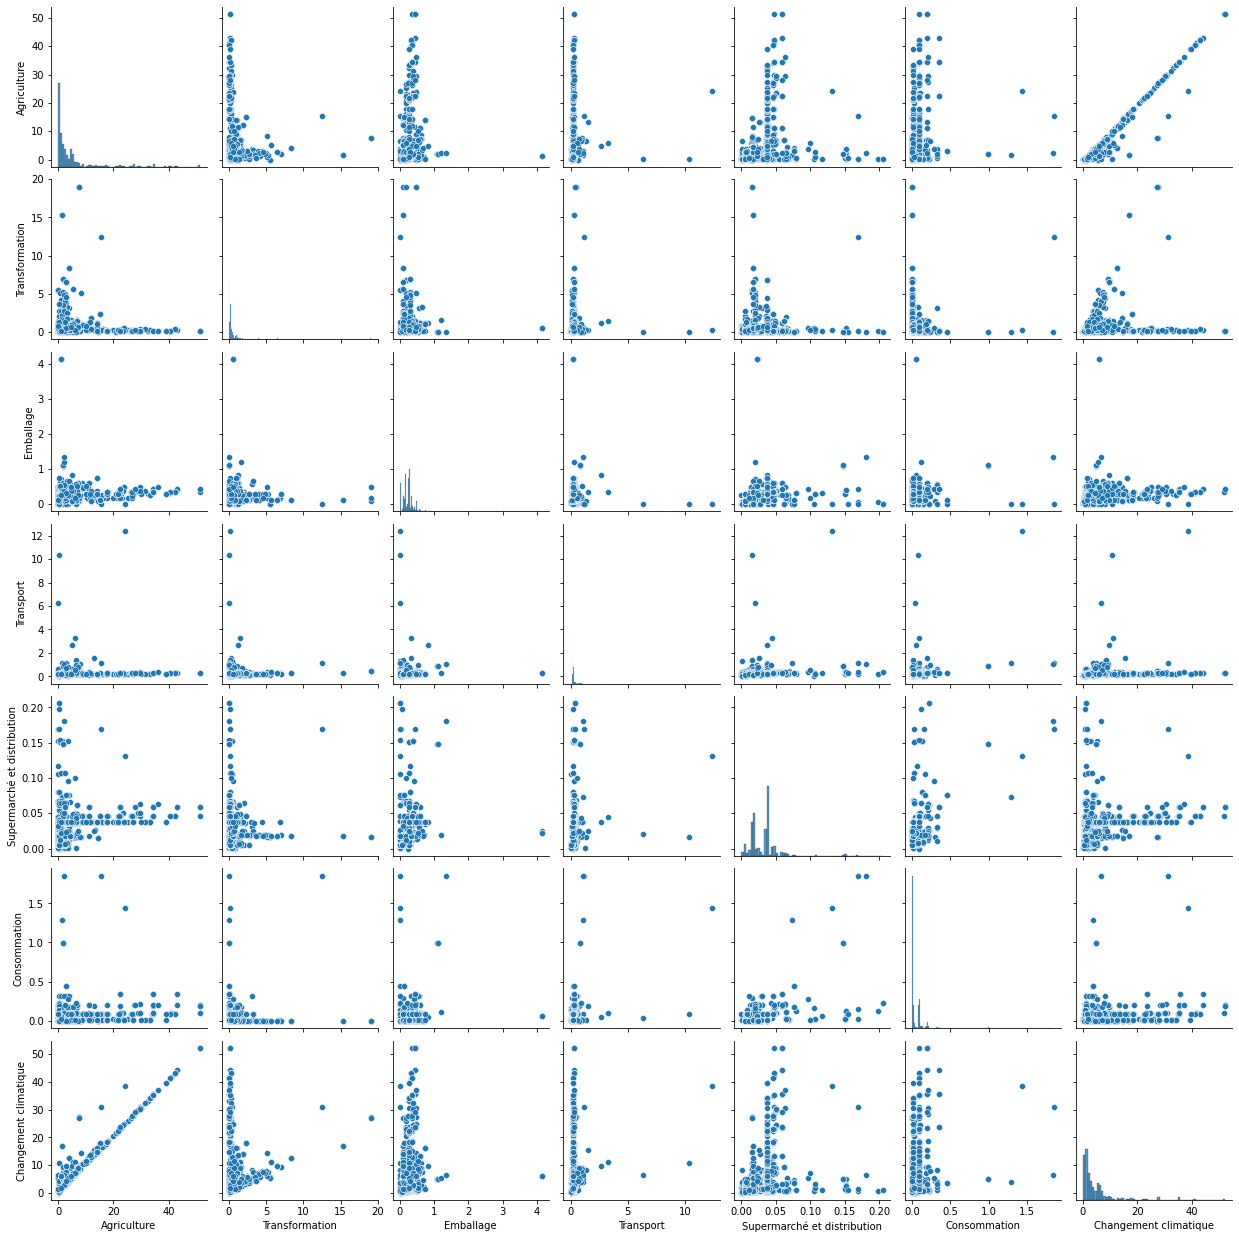

In [93]:
crbn_ftp_df = crbn_ftp_df.rename(columns={"Agriculture.1":"Agriculture", "Transformation.1":"Transformation", "Emballage.1":"Emballage", \
                                            "Transport.1":"Transport", "Supermarché et distribution.1":"Supermarché et distribution", \
                                            "Consommation.1":"Consommation"})
crbn_ftp_df.head()
sns.pairplot(crbn_ftp_df)
plt.show()

A partir de là nous allons choisir des classes binaire pour nos données. La médiane nous semble plus approprié que la moyenne.
Nous faisons donc la décision de prendre deux classes:
-  1: Haute empreinte carbone (correspond aux exemples qui ont une empreinte carbonne supérieure ou égale à la médiane)
- -1: Basse empreinte carbonne (correspond aux exemples qui ont une empreinte carbonne inférieure à la médiane)

In [94]:
crbn_ftp_moy = crbn_ftp_df["Changement climatique"].mean()
crbn_ftp_med = crbn_ftp_df["Changement climatique"].median()
print("Pour le carbon footprint nous avons la moyenne à: " + str(crbn_ftp_moy) + " et la médiane à: " + str(crbn_ftp_med))

Pour le carbon footprint nous avons la moyenne à: 5.972051290877796 et la médiane à: 2.68


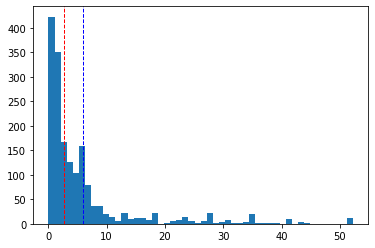

In [95]:
crbn_ftp_data = np.asarray(crbn_ftp_df)
plt.hist(crbn_ftp_data[:,-1], bins=50)
plt.axvline(crbn_ftp_med, color='red', linestyle='dashed', linewidth=1)
plt.axvline(crbn_ftp_moy, color='blue', linestyle='dashed', linewidth=1)

Nous faisons le choix de prendre la médiane comme separateur de nos classes.

In [99]:
# crbn_ftp_label = np.array([])
# for i in range(len(crbn_ftp_data[:,-1])):
#     if crbn_ftp_data[i,-1] >= float(crbn_ftp_med):
#         crbn_ftp_label = np.append(crbn_ftp_label, -1)
#     else:
#         crbn_ftp_label = np.append(crbn_ftp_label, 1)
# crbn_ftp_label

# Cette méthode est plus stylée

def label(x):
    return 1 if x < crbn_ftp_med else -1

crbn_ftp_label = np.array(crbn_ftp_df["Changement climatique"].apply(label))
crbn_ftp_label

array([-1., -1., -1., ..., -1., -1., -1.])

In [ ]:
crbn_ftp_df["Changement climatique"].head()

In [100]:
neg_data = crbn_ftp_data[crbn_ftp_label == -1]
pos_data = crbn_ftp_data[crbn_ftp_label == 1]

Text(0, 0.5, 'Changement climatique')

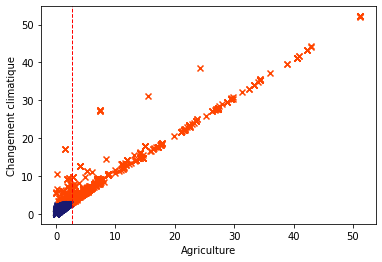

In [26]:
plt.scatter(neg_data[:, -1], neg_data[:, 0], marker='o', color="orangered", label="label -1")
plt.axvline(crbn_ftp_med, color='red', linestyle='dashed', linewidth=1)
plt.scatter(pos_data[:, -1], pos_data[:, 0], marker='x', color="midnightblue")
plt.xlabel("Agriculture")
plt.ylabel("Changement climatique")

(array([552., 103.,  62.,  38.,  27.,  37.,  28.,  12.,   6.,  11.]),
 array([ 2.68 ,  7.632, 12.584, 17.536, 22.488, 27.44 , 32.392, 37.344,
        42.296, 47.248, 52.2  ]),
 <BarContainer object of 10 artists>)

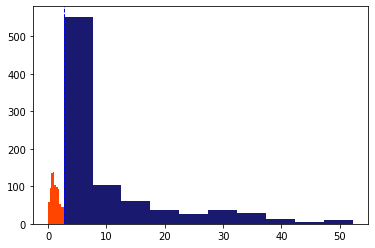

In [27]:
plt.hist(pos_data[:,-1], color="orangered", bins=10)
plt.axvline(crbn_ftp_med, color='b', linestyle='dashed', linewidth=1)
plt.hist(neg_data[:,-1], color="midnightblue", bins=10)

In [28]:
# Nous avons maintenant notre ensemble de données X (crbn_ftp_data) et notre ensemble de classe binaire (crbn_ftp_label)
print(crbn_ftp_data.shape)
if crbn_ftp_data.shape[1] == 7:
    crbn_ftp_data = crbn_ftp_data[:,:-1] 
print(crbn_ftp_data.shape)


(1743, 7)
(1743, 6)


#### Construction des bases d'apprentissage et de tests

In [29]:
np.random.seed(14)

p = np.random.permutation(len(crbn_ftp_data))
crbn_ftp_data = crbn_ftp_data[p]
crbn_ftp_label = crbn_ftp_label[p]

Séparrons maintenant nos données en base d'apprentissage et en base de tests.

In [30]:
crbn_ftp_train_data, crbn_ftp_test_data = np.split(crbn_ftp_data, [int(0.8*len(crbn_ftp_data))])
crbn_ftp_train_label, crbn_ftp_test_label = np.split(crbn_ftp_label, [int(0.8*len(crbn_ftp_label))])

In [31]:
print(crbn_ftp_train_data)

[[0.98394281 0.10143886 0.18055062 0.20559684 0.06451356 0.02530429]
 [0.74996094 0.95779525 0.28154442 0.13985546 0.01953111 0.        ]
 [0.94010056 0.         0.         0.38351699 0.02443032 0.21433375]
 ...
 [0.12781002 0.0378883  0.47839023 0.18824701 0.01537678 0.        ]
 [1.031677   2.0125144  0.35193053 0.18245743 0.02523786 0.0803704 ]
 [0.36313451 0.1710061  0.27125516 0.19640428 0.03739319 0.09275657]]


### Apprentissage et Visualisation

Pour notre apprentissage nous avons fait le choix d'utiliser trois algorithmes de classification:
- `Perceptron`
- `KNN`
- `Arbre de décision numérique`

#### Perceptron

Commençons par le classifieur perceptron que nous avons codé en TME. Nous allons d'abord initialiser notre modèle avec un learning rate à *0.01* et nous allons l'entrainer sur *100* itérations.

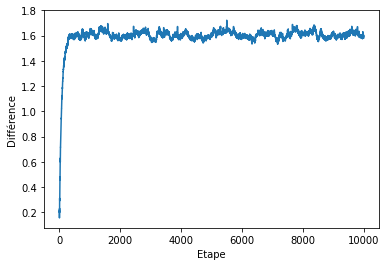

In [32]:
np.random.seed(14)

learning_rate = 0.01
perceptron = cl.ClassifierPerceptron(6, learning_rate, init=True)

train_acc = []
test_acc = []
variations_w = []

# Réalisation de N itérations
N = 100
before = time.time()
for i in range(N):
    variation = perceptron.train(crbn_ftp_train_data, crbn_ftp_train_label, diffs = variations_w, nb_max=1)
    #variations_w.append(variation)
    train_acc.append(perceptron.accuracy(crbn_ftp_train_data, crbn_ftp_train_label))
    test_acc.append(perceptron.accuracy(crbn_ftp_test_data, crbn_ftp_test_label))
after = time.time()

# Traçage de la courbe des variations
plt.plot(range(1, len(variations_w) + 1), variations_w)
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()


Comme nous pouvons le voir avec la courbe des variations du poids `w` l'algorithme converge assez rapidement.
Traçons maintenant les courbes de variations de l'accuracy sur l'ensemble d'entrainement ainsi que l'ensemble de tests.

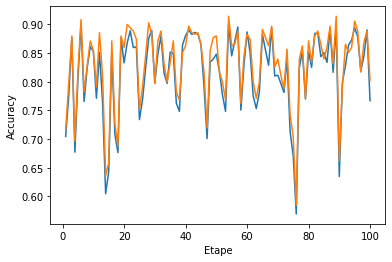

In [33]:
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc, label="train")  
plt.plot(range(1,N+1),test_acc, label="test")
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()

In [34]:
print("Accuracy finale sur le train: ",train_acc[-1])
print("Accuracy finale sur le test: ",test_acc[-1])
print("Le temps d'execution:", after-before)

Accuracy finale sur le train:  0.766857962697274
Accuracy finale sur le test:  0.8022922636103151
Le temps d'execution: 76.52158904075623


Nous remarquons que l'accuracy sur l'ensemble de test est supérieur d'à-peu-près 11% à l'accuracy de l'ensemble d'apprentissage.

Celà pourrait être dû à la taille de l'ensemble de test par rapport à l'ensemble d'apprentissage qui cause une variabilité statistique dans les performanes observées. Ou que simplement les exemples dans l'ensemble de test sont moins complexes à classifier que celles de l'ensemble d'apprentissage.

Pour avoir les idées plus claires nous allons effectuer une validation croisé sur notre modèle.

In [36]:
dump = ev.validation_croisee(perceptron, crbn_ftp_data, crbn_ftp_label, 10)
print("La moyenne:",dump[1])

0 : taille app.=  1570 taille test=  173 Accuracy: 0.8728323699421965
1 : taille app.=  1568 taille test=  175 Accuracy: 0.8342857142857143
2 : taille app.=  1567 taille test=  176 Accuracy: 0.8863636363636364
3 : taille app.=  1566 taille test=  177 Accuracy: 0.8870056497175142
4 : taille app.=  1564 taille test=  179 Accuracy: 0.8212290502793296
5 : taille app.=  1563 taille test=  180 Accuracy: 0.8888888888888888
6 : taille app.=  1562 taille test=  181 Accuracy: 0.8397790055248618
7 : taille app.=  1561 taille test=  182 Accuracy: 0.5824175824175825
8 : taille app.=  1559 taille test=  184 Accuracy: 0.8641304347826086
9 : taille app.=  1557 taille test=  186 Accuracy: 0.8548387096774194
La moyenne: 0.8331771041879751


Nous pouvons voir maintenant grâce à la validation croisée que la performance tourne plus autour de *77%* sur l'ensemble des tests. </br>
</br>
On va aussi faire une matrice de confusion grâce à la fonction fournie par la librairie `sklearn` pour avoir une idée de la performance de notre algorithme sur la prediction des classes de nos exemples.

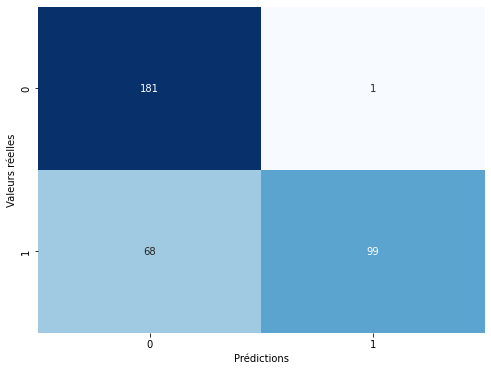

In [37]:
y_pred_perceptron = [perceptron.predict(x) for x in crbn_ftp_test_data]

# Création de la matrice de confusion
cm = confusion_matrix(crbn_ftp_test_label.astype(int), y_pred_perceptron)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()

Comme nous pouvons le voir dans notre matrice, notre modèle de perceptron se débrouille assez bien même si elle n'est pas optimal. Elle se débrouille bien pour prédire la classe de nos exemples </br>
- Nous avons **14** faux-positifs et **309** vrai-positifs.
- Et **4** faux-negatif et **22** vrai-negatifs.

Nous allons maintenant utiliser la fonction `roc_curve()` de `sklearn` pour traçer une courbe ROC qui nous permettra de voir le rapport entre le taux de vrais-positifs et faux-positifs. Nous utiliserons aussi la fonction `roc_auc_score()` qui nous calcule l'AUC (l'aire sous la courbe) qui nous permet d'avoir un chiffre pour mesurer la capacité de notre modèle perceptron à classer les exemples positifs. <br/>
Pour se faire nous devons d'abord rajouter une méthode dans notre classifieur perceptron pour avoir une prediction probabilistique des classes d'où la méthode `predict_proba()`.

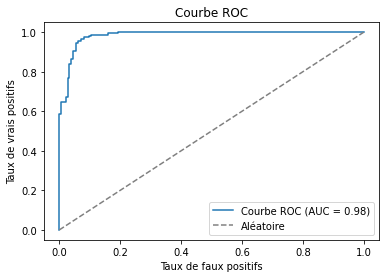

In [38]:
# Prédiction et probabilités
y_pred = [perceptron.predict(x) for x in crbn_ftp_test_data]
probas = [perceptron.predict_proba(x) for x in crbn_ftp_test_data]
probas = [p[1] for p in probas]  # Probabilités pour la classe positive

# Calcule le taux de vrais positifs et le taux de faux positifs
fpr, tpr, thresholds = roc_curve(crbn_ftp_test_label, probas)

# Calcule l'aire sous la courbe ROC (AUC)
auc = roc_auc_score(crbn_ftp_test_label, probas)

# Trace la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()


En resumé sur notre modèle **Perceptron**:
- Performance moyenne sur l'ensemble de tests avec la validation croisée de **0.77**
- AUC de **0.96**
- Temps d'éxécution sur 100 iterations d'à peu près **97**s

#### KNN

Nous allons maintenant faire la même chose avec notre algorithme de KNN, avec k fixé à 1.

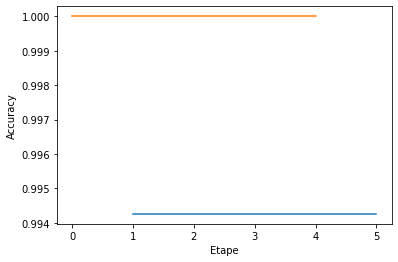

In [39]:
np.random.seed(14)

knn = cl.ClassifierKNN(6, 5)

train_acc_knn = []
test_acc_knn = []

# Réalisation de N itérations
N = 1
before_knn = time.time()
for i in range(N):
    knn.train(crbn_ftp_train_data, crbn_ftp_train_label)
    train_acc_knn.append(knn.accuracy(crbn_ftp_train_data, crbn_ftp_train_label))
    test_acc_knn.append(knn.accuracy(crbn_ftp_test_data, crbn_ftp_test_label))
after_knn = time.time()

# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc_knn,test_acc_knn)
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()

In [40]:
print("Accuracy finale sur le train: ",train_acc_knn[-1])
print("Accuracy finale sur le test: ",test_acc_knn[-1])
print("Le temps d'execution:", after_knn-before_knn)

Accuracy finale sur le train:  0.994261119081779
Accuracy finale sur le test:  1.0
Le temps d'execution: 2.506779670715332


Nous remarquons pour notre modèle knn que la performance et le temps d'execution est meilleure que notre modèle de perceptron. </br>
Juste pour le plaisir nous allons essayer de voir l'influence du k sur la performance, histoire de voir si ça change grand chose.

/mnt/c/Users/ndiay/Documents/School/3-2/S6/IADS/Tarek_Slim_Ball/projet/../iads/Classifiers.py:109: RuntimeWarning: invalid value encountered in long_scalars
  return 2 * (score/self.k -0.5)


Pour 0 voisins, nous avons une performance de 0.4785100286532951
Pour 1 voisins, nous avons une performance de 0.997134670487106
Pour 2 voisins, nous avons une performance de 0.997134670487106
Pour 3 voisins, nous avons une performance de 1.0
Pour 4 voisins, nous avons une performance de 1.0
Pour 5 voisins, nous avons une performance de 1.0
Pour 6 voisins, nous avons une performance de 1.0
Pour 7 voisins, nous avons une performance de 1.0
Pour 8 voisins, nous avons une performance de 1.0
Pour 9 voisins, nous avons une performance de 0.997134670487106
Pour 10 voisins, nous avons une performance de 0.997134670487106
Pour 11 voisins, nous avons une performance de 0.994269340974212
Pour 12 voisins, nous avons une performance de 0.994269340974212
Pour 13 voisins, nous avons une performance de 0.994269340974212
Pour 14 voisins, nous avons une performance de 0.994269340974212


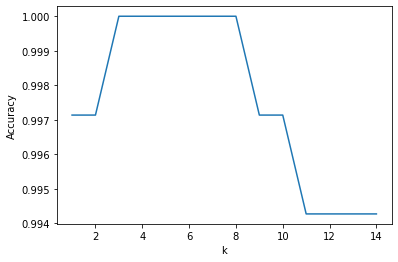

In [41]:
knns = []
for k in range(0,15):
    knns.append(cl.ClassifierKNN(6, k))
    knns[k].train(crbn_ftp_train_data, crbn_ftp_train_label)
    print("Pour",k,"voisins, nous avons une performance de",knns[k].accuracy(crbn_ftp_test_data, crbn_ftp_test_label))
    
plt.plot(range(1,15), [acc for acc in [knns[k].accuracy(crbn_ftp_test_data, crbn_ftp_test_label) for k in range(1,15)]])
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()
    
    

Nous allons maintenant passer à la validation croisé pour avoir une meilleure idée des performances de notre algorithme et ainsi la comparer aux autres modèles.

In [42]:
dump = ev.validation_croisee(knn, crbn_ftp_data, crbn_ftp_label, 10)
print("La moyenne:",dump[1])

0 : taille app.=  1570 taille test=  173 Accuracy: 0.9942196531791907
1 : taille app.=  1568 taille test=  175 Accuracy: 0.9942857142857143
2 : taille app.=  1567 taille test=  176 Accuracy: 0.9943181818181818
3 : taille app.=  1566 taille test=  177 Accuracy: 0.9943502824858758
4 : taille app.=  1564 taille test=  179 Accuracy: 0.9832402234636871
5 : taille app.=  1563 taille test=  180 Accuracy: 0.9944444444444445
6 : taille app.=  1562 taille test=  181 Accuracy: 1.0
7 : taille app.=  1561 taille test=  182 Accuracy: 0.9835164835164835
8 : taille app.=  1559 taille test=  184 Accuracy: 1.0
9 : taille app.=  1557 taille test=  186 Accuracy: 1.0
La moyenne: 0.9938374983193577


Nous pouvons voir que la moyenne est largement supérieur au modèle de perceptron avec une moyenne à *97%*.

Nous allons aussi faire la matrice de confusion et la courbe ROC histoire d'avoir une meilleure idée de la classification de ce modèle et ainsi avoir des bases de comparaison.

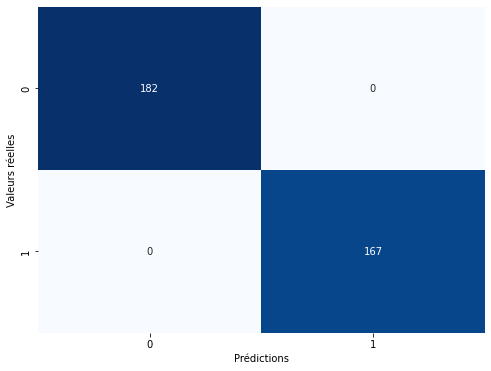

In [43]:
y_pred_knn = [knn.predict(x) for x in crbn_ftp_test_data]

# Création de la matrice de confusion
cm = confusion_matrix(crbn_ftp_test_label.astype(int), y_pred_knn)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()

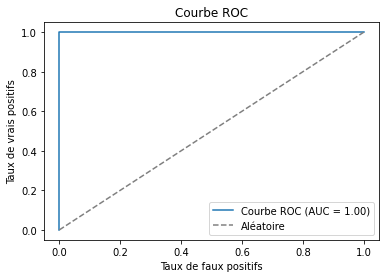

In [44]:
# Prédiction et probabilités
y_pred = [knn.predict(x) for x in crbn_ftp_test_data]
probas = [knn.predict_proba(x) for x in crbn_ftp_test_data]
probas = [p[1] for p in probas]  # Probabilités pour la classe positive

# Calcule le taux de vrais positifs et le taux de faux positifs
fpr, tpr, thresholds = roc_curve(crbn_ftp_test_label, probas)

# Calcule l'aire sous la courbe ROC (AUC)
auc = roc_auc_score(crbn_ftp_test_label, probas)

# Trace la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

Comme nous pouvons le voir grace à la matrice de confusion et à notre courbe ROC, notre modèle KNN se debrouille largement mieux le perceptron encore une fois dans la prediction des vrais-positifs et vrais-negatifs. 

En resumé sur notre modèle **KNN**:
- Performance moyenne sur l'ensemble de tests avec la validation croisée **0.98**
- AUC de **1.00**
- Temps d'éxécution sur 100 iterations d'à peu près **47**s

#### Arbre de décision

Attaquons nous maintenant à notre 3e classifieur, nous allons comme pour les deux premiers entrainer notre modèle sur les données, regarder la performance et le temps d'execution afin de choisir le modèle le plus performant pour la prédiction de l'empreinte carbonne des aliments.

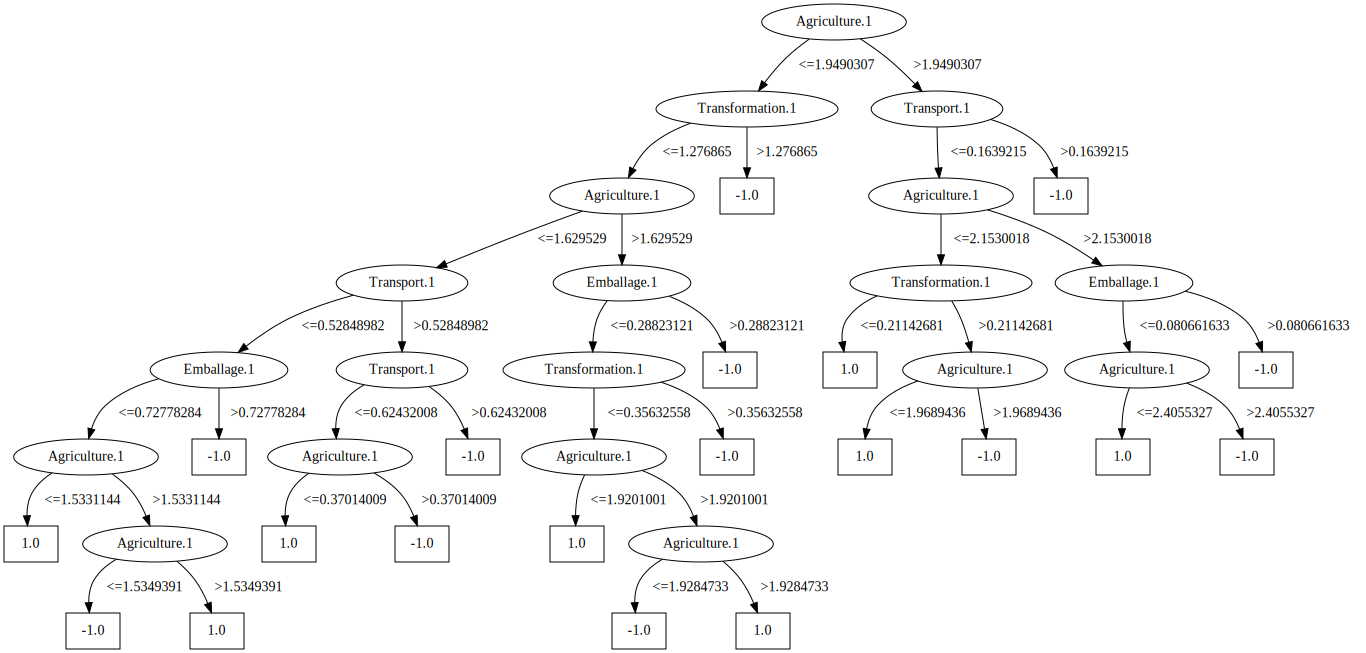

In [45]:
# Temps d'éxécution trop long

np.random.seed(14)

arbreDecision = cl.ClassifierArbreNumerique(6, 0.0, crbn_ftp_df.columns)

train_acc_abr = []
test_acc_abr = []

# Réalisation de N itérations
N = 1
before_abr = time.time()
for i in range(N):
    arbreDecision.train(crbn_ftp_train_data, crbn_ftp_train_label)
    train_acc_abr.append(arbreDecision.accuracy(crbn_ftp_train_data, crbn_ftp_train_label))
    test_acc_abr.append(arbreDecision.accuracy(crbn_ftp_test_data, crbn_ftp_test_label))
after_abr = time.time()

graphe_arbre = gv.Digraph(format='png')
arbreDecision.affiche(graphe_arbre)
graphe_arbre

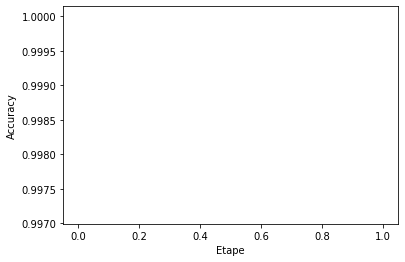

In [46]:
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc_abr,test_acc_abr)
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()

In [47]:
print("Accuracy finale sur le train: ",train_acc_abr[-1])
print("Accuracy finale sur le test: ",test_acc_abr[-1])
print("Le temps d'execution:", after_abr-before_abr)

Accuracy finale sur le train:  1.0
Accuracy finale sur le test:  0.997134670487106
Le temps d'execution: 4.636983633041382


Notre modèle d'arbre de décision à une performance equivalente à notre modèle KNN. Cependant le temps d'execution est beaucoup plus long ce qui était un peu prévisible vu la profondeur de l'arbre et la taille des données. </br>

In [48]:
dump = ev.validation_croisee(arbreDecision, crbn_ftp_data, crbn_ftp_label, 10)
print("La moyenne est de: ", dump[1])

0 : taille app.=  1570 taille test=  173 Accuracy: 1.0
1 : taille app.=  1568 taille test=  175 Accuracy: 0.9714285714285714
2 : taille app.=  1567 taille test=  176 Accuracy: 1.0
3 : taille app.=  1566 taille test=  177 Accuracy: 0.9830508474576272
4 : taille app.=  1564 taille test=  179 Accuracy: 0.9888268156424581
5 : taille app.=  1563 taille test=  180 Accuracy: 0.9888888888888889
6 : taille app.=  1562 taille test=  181 Accuracy: 0.994475138121547
7 : taille app.=  1561 taille test=  182 Accuracy: 0.978021978021978
8 : taille app.=  1559 taille test=  184 Accuracy: 0.9891304347826086
9 : taille app.=  1557 taille test=  186 Accuracy: 1.0
La moyenne est de:  0.989382267434368


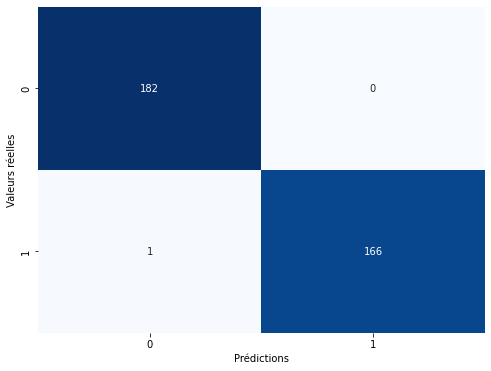

In [49]:
y_pred_abr = [arbreDecision.predict(x) for x in crbn_ftp_test_data]

# Création de la matrice de confusion
cm = confusion_matrix(crbn_ftp_test_label.astype(int), y_pred_abr)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()

La matrice de confusion nous montre que notre arbre de décision est au coude à coude avec le KNN quant à la classification de nos exemples.

En resumé sur notre modèle **Arbre de Décision**:
- Performance moyenne sur l'ensemble de tests avec la validation croisée **0.97**
- Temps d'éxécution sur 100 iterations de **14**s

### Comparaison des modèles

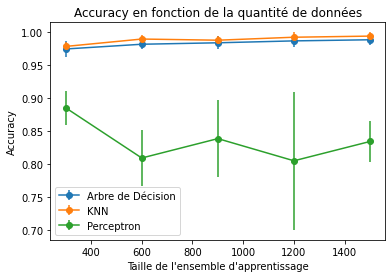

In [50]:
# Le temps d'éxécution de ce bloc est très très très long, je vous conseillerai de vous équiper de votre pop-corn ou d'aller faire une balade

train_sizes = [300, 600, 900, 1200, 1500]

perf, perf_moy_abr, perf_sd_abr = ev.validation_croisee_size(arbreDecision, crbn_ftp_data, crbn_ftp_label, 10, train_sizes)
perf, perf_moy_knn, perf_sd_knn = ev.validation_croisee_size(knn, crbn_ftp_data, crbn_ftp_label, 10, train_sizes)
perf, perf_moy_percep, perf_sd_percep = ev.validation_croisee_size(perceptron, crbn_ftp_data, crbn_ftp_label, 10, train_sizes)

perf_moy_list = [perf_moy_abr, perf_moy_knn, perf_moy_percep]
perf_sd_list = [perf_sd_abr, perf_sd_knn, perf_sd_percep]
labels = ['Arbre de Décision', 'KNN', 'Perceptron']
ev.plot_performance(train_sizes, perf_moy_list, perf_sd_list, labels)

Sur la base de ces résultats, on peut conclure que :

Le modèle **KNN** et **Arbre de Décision** sont ici les plus performants avec une accuracy généralement élévée (autour de 90) qu'importe la taille des données, le choix du meilleur modèle va plus se porter sur le temps d'execution: le temps de calcul augmente exponentiellement avec la taille des données pour l'Arbre de Décision quand les données n'ont pas été "cleanés". </br>
Le **Perceptron** présente des performances légèrement inférieures aux autres modèles, avec une accuracy plus faible dans tous les cas. </br>

### Experimentations

Dans cette partie nous allons faire differentes autres experimentations que nous avions voulu tester: Construire la base d'apprentissage en prenant en compte le QDR (fiabilité des données), Interroger un modèle sur sa prediction par rapport à l'eco-responsabilité d'un aliment, KNN version multi-classes

#### Data-Cleaning

Nous avons vu dans la documentation du site Agribalyse que les données ont une note de fiabilité noté DQR (Data Quality Ratio) allant de 1 à 5, nous avons donc décidé de reconsidérer notre base de données en prenant en compte ce facteur. </br>
Ce choix a eu pour conséquence l'augmentation de la performance de tous nos modèles, tout particuliérement le knn: çela pourrait être lié à l'amelioration de la qualité des données tout comme ça pourrait être tout simplement la réduction de l'ensemble de donnée.
Le temps d'éxécution de notre modèle d'arbre de décision numérique s'est tout particulièrement réduit.

#### Fonction pour interroger les modèles à partir du nom d'un aliment

In [111]:
import re

names = data_etapes["Nom du Produit en Français"].unique()
crbn_ftp_comp = data_etapes[["Nom du Produit en Français","Agriculture", "Transformation", "Emballage", "Transport", "Supermarché et distribution", "Consommation"]]
crbn_ftp_comp["Vraie Valeur"] = data_synthese["Changement climatique"]


def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search

def isItEnvironmentallyFriendly(x, model = "knn"):
    if len(x) != 6:
        raise ValueError("Vous devez mêttre tous les caracteristiques de x sous la forme d'une liste doit être de 6")
    x = np.array(x)
    x = x.reshape(1, -1)
    if model == "knn":
        pred = knn.predict(x)
    elif model == "perceptron":
        pred = perceptron.predict(x)
    elif model == "arbre":
        pred = arbreDecision.predict(x)
    if pred == -1:
        print("L'aliment n'est pas eco-responsable")
    else:
        print("L'aliment est eco-responsable")
    isItReally(x, pred)

def isItEnvironmentallyFriendlyByName(name, model = "knn"):
    
    temp_df = crbn_ftp_comp[crbn_ftp_comp['Nom du Produit en Français'].isin([name])]
    
    name = name.lower()
    found = []
    
    print(temp_df.head())
    
    
    for n in names:
        lower = n.lower()
        if findWholeWord(name)(lower) != None:
            x = crbn_ftp_comp.loc[crbn_ftp_comp["Nom du Produit en Français"] == n]
            x = x.drop(columns=["Nom du Produit en Français","Vraie Valeur"])
            x = np.asarray(x)
            if model == "knn":
                pred = knn.predict(x)
                found.append((n, pred))
            elif model == "perceptron":
                pred = perceptron.predict(x)
                found.append((n, pred))
            elif model == "arbre":
                pred = arbreDecision.predict(x)
                found.append((n, pred))
            
    if len(found) == 0:
        print("L'aliment",name,"n'est pas dans notre base de données.")
    else:
        print(len(found), "aliment(s) correspondent à votre recherche, voici la liste et leur prédiction:\n")
        for f in found:
            if f[1] == -1:
                print(f[0],": non eco-responsable")
            else:
                print(f[0],": eco-responsable")
            isItReally(f[0], f[1])
                
def isItReally(name, pred):
    x = crbn_ftp_comp.loc[crbn_ftp_comp["Nom du Produit en Français"] == name]
    x = np.asarray(crbn_ftp_comp["Vraie Valeur"])
    b = x[0] > crbn_ftp_med
    if pred == -1 and b == False or pred == 1 and b == True:
        print("------Confirmé par la base de donnée------")
    else:
        print("------Infirmé par la base de donnée-------")
    

/tmp/ipykernel_603/884506391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crbn_ftp_comp["Vraie Valeur"] = data_synthese["Changement climatique"]


In [112]:
isItEnvironmentallyFriendlyByName("Ail. cru", "knn")

  Nom du Produit en Français  Agriculture  Transformation  Emballage  \
2                   Ail. cru     0.040826             0.0        0.0   

   Transport  Supermarché et distribution  Consommation  Vraie Valeur  
2   0.014071                     0.005629      0.003288         0.356  
1 aliment(s) correspondent à votre recherche, voici la liste et leur prédiction:

Ail. cru : eco-responsable
------Confirmé par la base de donnée------


#### Knn multi-classes

## Apprentissage non-supervisé

### Problématique

<div class="alert alert-block alert-info">
Par la suite on va s'intéressé à la Classification des produits alimentaires en fonction de leurs caractéristiques nutritionnelles et leurs impact sur la santé Humaines pour une application de régimes alimentaires.

Nous utiliserons les algorithmes :  

*   Clustering Hierarchique Agglomératif
*   K-Means

Afin regrouper les produits similaires en termes de composition nutritionnelle.

Cette classification permettra d'analyser les similitudes et les différences entre les produits alimentaires en fonction de leur effets toxicologiques, ce qui pourrait avoir des implications pour la santé et la recommandation de produits adaptés.
    
 * **Les indicateurs "Effets toxicologiques sur la santé humaine : substances non cancérigènes" et "Effets toxicologiques sur la santé humaine : substances cancérigènes" font référence aux effets néfastes sur la santé humaine résultant de l'exposition à des substances chimiques.**

* **Ces indicateurs sont utilisés pour évaluer l'impact potentiel des substances chimiques sur la santé humaine, en prenant en compte les effets à court terme (non cancérigènes) et les effets à long terme (cancérigènes). Ils sont souvent basés sur des études scientifiques et des évaluations toxicologiques pour estimer les risques pour la santé associés à l'exposition à ces substances.**    

### Exploration des données

Nous utilisons deux bases de données pour notre analyse : 
* la "Base Synthèse" 
* la "Base Ingrédients" 

provenant de l'AGRIBALYSE. **Notons que la version 3.1 de l'AGRIBALYSE que nous utilisons intègre de nouvelles informations sur les effets toxicologiques sur la santé humaine par rapport à la version précédente (AGRIBALYSE 3.0)**. Cette évolution nous permet d'aborder plus en détail la problématique de l'impact des produits alimentaires sur la santé humaine.

**Perspective globale vs perspective spécifique :** 

L'analyse du groupe d'aliments nocifs pour la santé permet de prendre en compte les interactions complexes entre les différents ingrédients présents dans un aliment, ainsi que les effets cumulatifs résultant de leur consommation combinée. Cela offre une perspective plus holistique des impacts sur la santé. En revanche, l'analyse du groupe d'ingrédients nocifs pour la santé se concentre sur des éléments spécifiques et permet d'identifier les ingrédients individuels qui peuvent être préjudiciables. Cela peut être pertinent pour comprendre en détail les composants responsables des effets sur la santé.

In [196]:
data_synthese.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.52,12.70,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.02,6.23,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.29,12.60,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088


In [197]:
print(data_synthese.shape)

(2517, 29)


In [198]:
data_ingredients.head()

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Fromage frais crémeux,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500,90.100,0.310,8.090,1.480000e-05
1,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Autres étapes,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310,9.060,0.144,15.300,2.320000e-06
2,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Total,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900,99.200,0.455,23.400,1.710000e-05
3,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Huile d'olive,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580,54.300,1.950,1.720,1.890000e-06
4,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Oignons,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231,0.998,0.165,0.138,1.520000e-07


In [199]:
print(data_ingredients.shape)

(6856, 27)


### Perspective globale (Base Synthèse)

#### Prétraitement des données

##### Qualité des données

Une note de qualité - le Data Quality Ratio (DQR) - de 1, très bon, à 5, très mauvais - est associée à chaque produit agricole et alimentaire pour lequel Agribalyse fournit des inventaires de cycle de vie et des indicateurs d’impacts. La Commission Européenne recommande de la prudence dans l’utilisation des données avec des DQR supérieurs à 3. Dans la base de données AGRIBALYSE, 67 % des données ont un DQR jugé bon ou très bon (1 à 3).


<font color="RED">**Pour cette raison, nous allons retirer les produits avec un `DQR > 3` pour la partie d'apprentissage, comme ça, nous allons faire apprendre les différents classifieurs avec des données considérées fiables.**</font>


In [200]:
data_synthese_fiable = data_synthese[data_synthese['DQR']<=3]

print(data_synthese_fiable.shape)

(1766, 29)


In [201]:
data_synthese_analyse= data_synthese_fiable[['Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes', 'Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes']]
data_synthese_analyse.head()

,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes
0,7.440000e-08,6.480000e-09
4,7.440000e-08,6.480000e-09
5,7.360000e-08,6.370000e-09
6,4.780000e-08,1.470000e-09
10,3.100000e-08,1.470000e-09


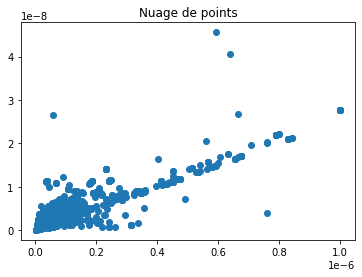

In [202]:
plt.scatter(data_synthese_analyse['Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes'], data_synthese_analyse['Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes'])
plt.title('Nuage de points')
plt.show()

In [203]:
df_synthese_norm=clust.normalisation(data_synthese_analyse)
df_synthese_norm.head()

,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes
0,0.073279,0.141003
4,0.073279,0.141003
5,0.072478,0.138588
6,0.046646,0.030994
10,0.029826,0.030994


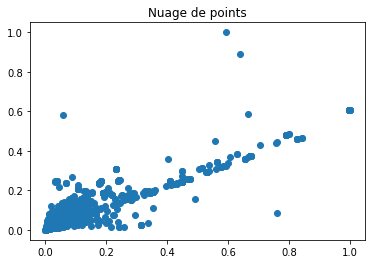

In [204]:
plt.scatter(df_synthese_norm['Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes'], df_synthese_norm['Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes'])
plt.title('Nuage de points')
plt.show()

#### Algorithme de Clustering Hierarchique

L'algorithme de clustering que nous utilisons présente une complexité temporelle élevée, avec une progression quadratique de l'ordre de O(n^3), où n représente le nombre de données. Cette complexité peut devenir un défi lors de l'analyse de grandes bases de données, ce qui entraîne des temps d'exécution considérables.

Afin d'optimiser le temps d'exécution sans compromettre la pertinence des résultats, nous avons décidé de prendre un échantillon représentatif des données. Cela nous permet d'avoir un aperçu global des similitudes et des différences entre les produits alimentaires, tout en réduisant la charge de calcul. L'échantillonnage est réalisé de manière à préserver les caractéristiques essentielles des données et à maintenir la structure générale des nuages de points.

Cette approche d'échantillonnage nous permet de concilier la nécessité de réduire la complexité temporelle de l'algorithme de clustering tout en préservant la pertinence des résultats obtenus.

In [205]:
# Définisssion du pourcentage d'échantillonnage désiré
pourcentage_echantillonnage = 0.01

df_echantillon = df_synthese_norm.sample(frac=pourcentage_echantillonnage, random_state=42)

df_echantillon

,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes
2215,0.028625,0.075129
346,0.001332,0.001416
2252,0.098910,0.097966
1166,0.126944,0.078643
1707,0.034732,0.033848
2378,0.420299,0.231470
2410,0.070676,0.093135
726,0.239079,0.038899
1451,0.063467,0.074690
636,0.047347,0.051415


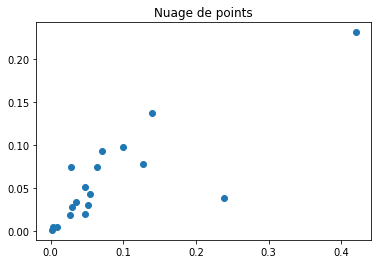

In [206]:
plt.scatter(df_echantillon['Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes'], df_echantillon['Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes'])
plt.title('Nuage de points')
plt.show()

Distance mininimale trouvée entre [1,15]  = 0.0035516989927952534
Distance mininimale trouvée entre [16,18]  = 0.0068796851933030315
Distance mininimale trouvée entre [4,14]  = 0.008215106270542559
Distance mininimale trouvée entre [9,13]  = 0.010896869426851086
Distance mininimale trouvée entre [11,12]  = 0.012106076886826052
Distance mininimale trouvée entre [17,20]  = 0.01315337268053289
Distance mininimale trouvée entre [22,23]  = 0.01874722523941189
Distance mininimale trouvée entre [6,8]  = 0.019803363398080896
Distance mininimale trouvée entre [21,24]  = 0.024885519942642643
Distance mininimale trouvée entre [2,3]  = 0.03404820717822967
Distance mininimale trouvée entre [0,25]  = 0.03943703189848974
Distance mininimale trouvée entre [19,26]  = 0.046855315517408944
Distance mininimale trouvée entre [10,27]  = 0.056125046725239755
Distance mininimale trouvée entre [28,29]  = 0.062198261827732894
Distance mininimale trouvée entre [30,31]  = 0.1096637031981727
Distance mininimale tr

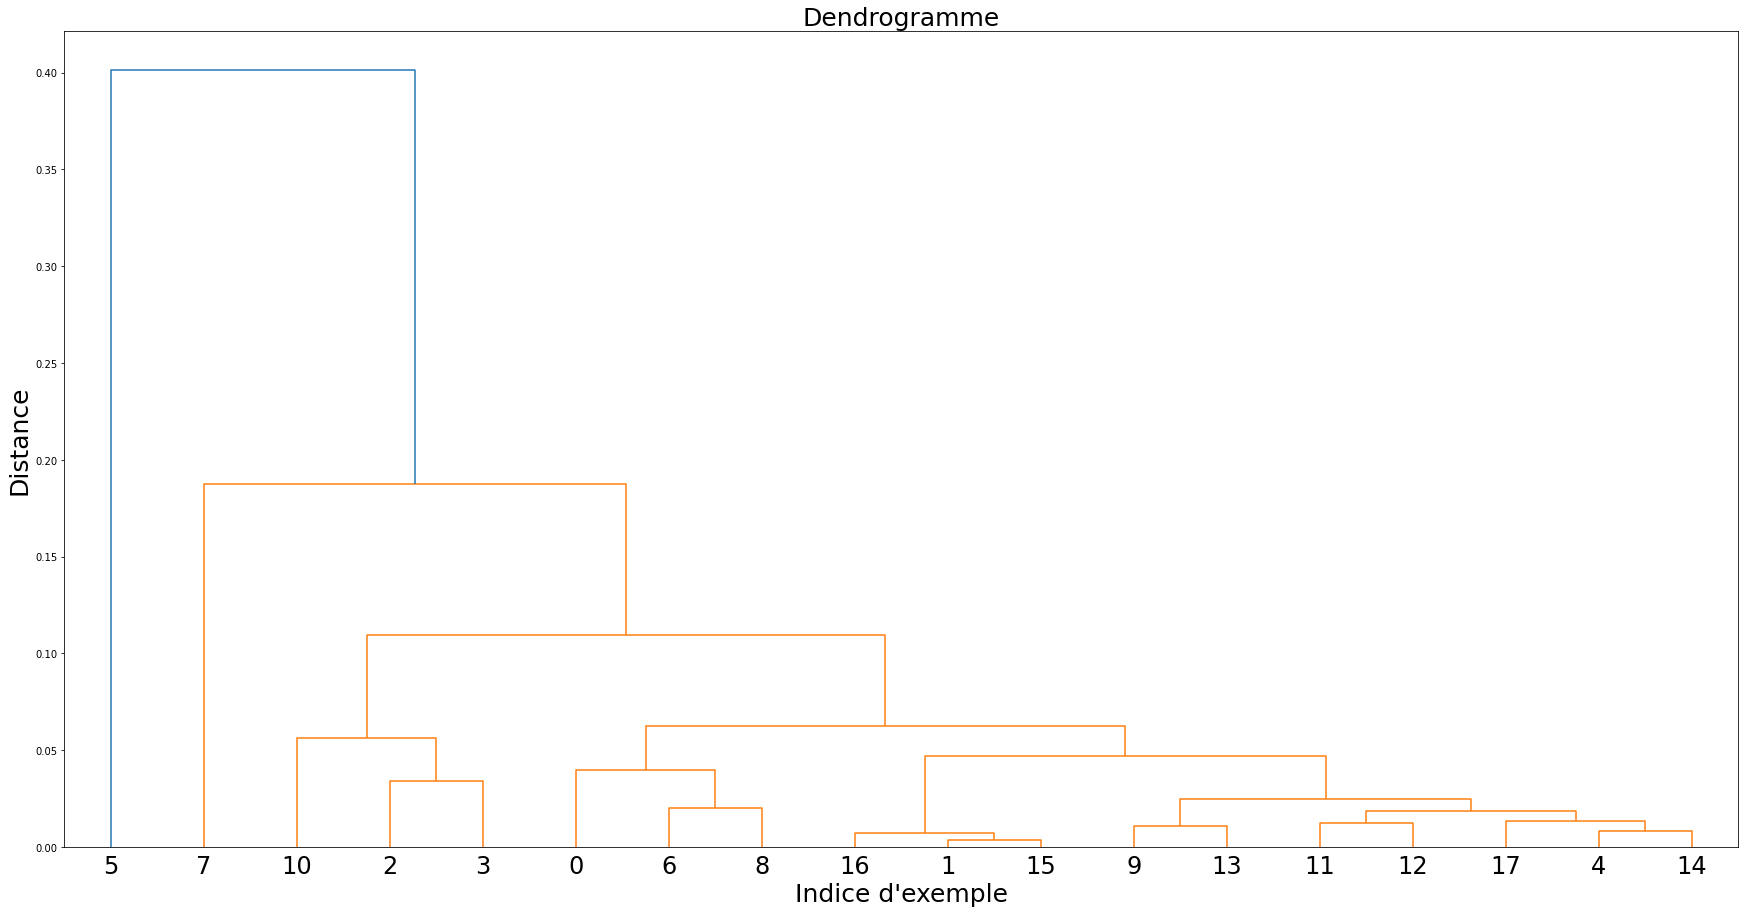

Temps d'éxecution total est  2.2878246307373047


In [207]:
import time
start1 = time.time()
resultat = clust.CHA_centroid(df_echantillon,True,True)
clustering = time.time() - start1  
print("Temps d'éxecution total est ",clustering)

In [208]:
# Affichage des 5 derniers clusters
clust.clustering_info(resultat,data_synthese,5)

Cluster 0:
Bicarbonate de soude
Fenugrec, graine

Cluster 1:
Fleur de sel, non iodée, non fluorée
Fucus vésiculeux (Fucus serratus ou Fucus vesiculosus), séché ou déshydraté

Cluster 2:
Gélatine, sèche
Gingembre, poudre

Cluster 3:
Base de pizza tomatée
Gingembre, racine crue

Cluster 4:
Ascophylle noueux ou goémon noir (Ascophyllum nodosum), séché ou déshydraté
Gracilaire ou ogonori (Gracilaria verrucosa), séchée ou déshydratée



In [209]:
clust_nocif = clust.cluster_nocif(resultat, data_synthese, 'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes','Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes')
print("Le cluster le plus nocif est le cluster : \n", clust_nocif)

Le cluster le plus nocif est le cluster : 
 19    Court-bouillon pour poissons, déshydraté
26                             Fenouil, graine
Name: Nom du Produit en Français, dtype: object


Distance mininimale trouvée entre [1,15]  = 0.0035516989927952534
Distance mininimale trouvée entre [16,18]  = 0.008076060567044267
Distance mininimale trouvée entre [4,14]  = 0.008215106270542559
Distance mininimale trouvée entre [9,13]  = 0.010896869426851086
Distance mininimale trouvée entre [11,12]  = 0.012106076886826052
Distance mininimale trouvée entre [17,20]  = 0.0170021902461848
Distance mininimale trouvée entre [6,8]  = 0.019803363398080896
Distance mininimale trouvée entre [22,23]  = 0.026914319562342075
Distance mininimale trouvée entre [2,3]  = 0.03404820717822967
Distance mininimale trouvée entre [21,25]  = 0.0385458654405221
Distance mininimale trouvée entre [0,24]  = 0.04574359698155615
Distance mininimale trouvée entre [10,26]  = 0.0602696369497899
Distance mininimale trouvée entre [19,27]  = 0.06795055576643726
Distance mininimale trouvée entre [28,30]  = 0.11498203486652592
Distance mininimale trouvée entre [7,29]  = 0.15210663787803816
Distance mininimale trouvée e

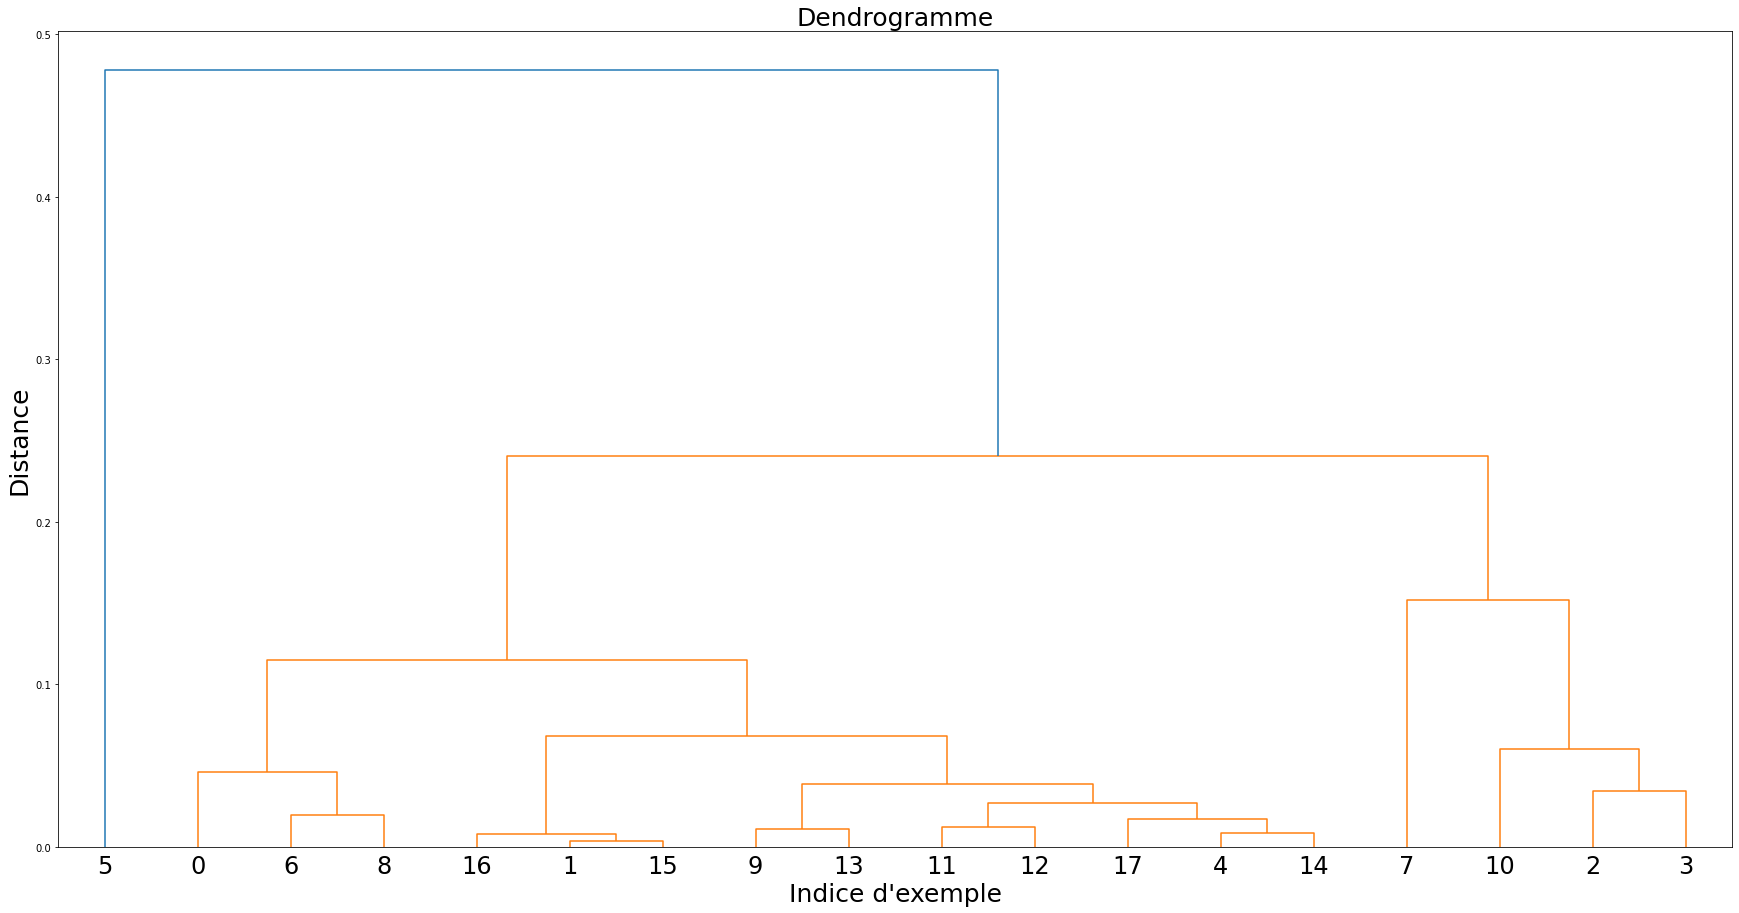

0.7509465217590332


In [210]:
before_complete = time.time()
complete = clust.CHA_complet(df_echantillon, True, True)
after_complete = time.time()
time_complete = after_complete - before_complete
print(time_complete)

In [211]:
clust.clustering_info(complete,data_synthese,5)
clust_nocif_complete = clust.cluster_nocif(complete, data_synthese, 'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes','Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes')
print("Le cluster le plus nocif est le cluster : \n", clust_nocif)

Cluster 0:
Court-bouillon pour poissons, déshydraté
Fenugrec, graine

Cluster 1:
Fleur de sel, non iodée, non fluorée
Gélatine, sèche

Cluster 2:
Base de pizza tomatée
Fucus vésiculeux (Fucus serratus ou Fucus vesiculosus), séché ou déshydraté

Cluster 3:
Gingembre, poudre
Gingembre, racine crue

Cluster 4:
Ascophylle noueux ou goémon noir (Ascophyllum nodosum), séché ou déshydraté
Gracilaire ou ogonori (Gracilaria verrucosa), séchée ou déshydratée

Le cluster le plus nocif est le cluster : 
 19    Court-bouillon pour poissons, déshydraté
26                             Fenouil, graine
Name: Nom du Produit en Français, dtype: object


Distance mininimale trouvée entre [1,15]  = 0.0035516989927952534
Distance mininimale trouvée entre [16,18]  = 0.005978684245137048
Distance mininimale trouvée entre [4,14]  = 0.008215106270542559
Distance mininimale trouvée entre [17,20]  = 0.009523231494438759
Distance mininimale trouvée entre [9,13]  = 0.010896869426851086
Distance mininimale trouvée entre [11,12]  = 0.012106076886826052
Distance mininimale trouvée entre [22,23]  = 0.012786048708044435
Distance mininimale trouvée entre [21,24]  = 0.016410016376734136
Distance mininimale trouvée entre [6,8]  = 0.019803363398080896
Distance mininimale trouvée entre [19,25]  = 0.022959537640511153
Distance mininimale trouvée entre [26,27]  = 0.028312296256922408
Distance mininimale trouvée entre [2,28]  = 0.028644444654404265
Distance mininimale trouvée entre [0,29]  = 0.030214593319940402
Distance mininimale trouvée entre [3,30]  = 0.03404820717822967
Distance mininimale trouvée entre [10,31]  = 0.056984671691491184
Distance mininimal

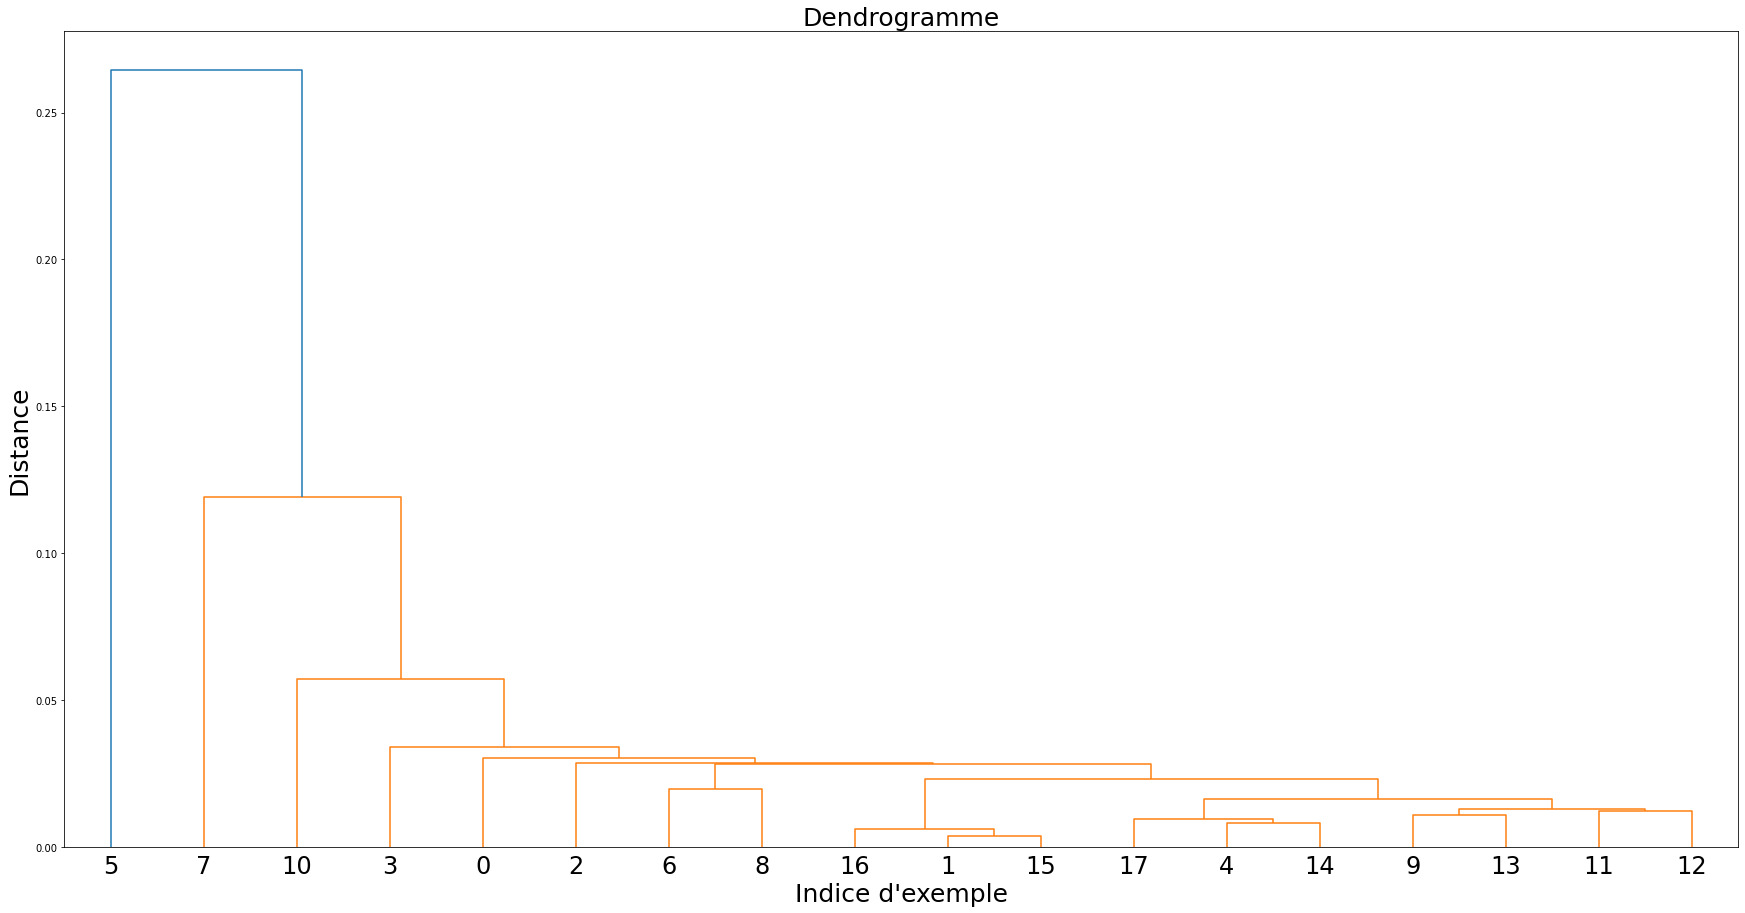

0.7307758331298828


In [212]:
before_simple = time.time()
simple = clust.CHA_simple(df_echantillon, True, True)
after_simple = time.time()
time_simple = after_simple - before_simple
print(time_simple)

In [213]:
clust.clustering_info(simple,data_synthese,5)
clust_nocif_simple = clust.cluster_nocif(simple, data_synthese, 'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes','Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes')
print(clust_nocif_simple)

Cluster 0:
Agar (algue), cru
Fucus vésiculeux (Fucus serratus ou Fucus vesiculosus), séché ou déshydraté

Cluster 1:
Aneth, frais
Gélatine, sèche

Cluster 2:
Bicarbonate de soude
Gingembre, poudre

Cluster 3:
Base de pizza tomatée
Gingembre, racine crue

Cluster 4:
Ascophylle noueux ou goémon noir (Ascophyllum nodosum), séché ou déshydraté
Gracilaire ou ogonori (Gracilaria verrucosa), séchée ou déshydratée

19    Court-bouillon pour poissons, déshydraté
25                             Estragon, frais
Name: Nom du Produit en Français, dtype: object


Distance mininimale trouvée entre [1,15]  = 0.0035516989927952534
Distance mininimale trouvée entre [16,18]  = 0.007027372406090658
Distance mininimale trouvée entre [4,14]  = 0.008215106270542559
Distance mininimale trouvée entre [9,13]  = 0.010896869426851086
Distance mininimale trouvée entre [11,12]  = 0.012106076886826052
Distance mininimale trouvée entre [17,20]  = 0.013262710870311778
Distance mininimale trouvée entre [6,8]  = 0.019803363398080896
Distance mininimale trouvée entre [22,23]  = 0.020664991025445244
Distance mininimale trouvée entre [25,21]  = 0.026851926970216617
Distance mininimale trouvée entre [2,3]  = 0.03404820717822967
Distance mininimale trouvée entre [0,24]  = 0.04029426176418021
Distance mininimale trouvée entre [19,26]  = 0.04748191140250032
Distance mininimale trouvée entre [10,27]  = 0.05862715432064054
Distance mininimale trouvée entre [28,29]  = 0.06598913016246481
Distance mininimale trouvée entre [30,31]  = 0.11249835209261498
Distance mininimale tro

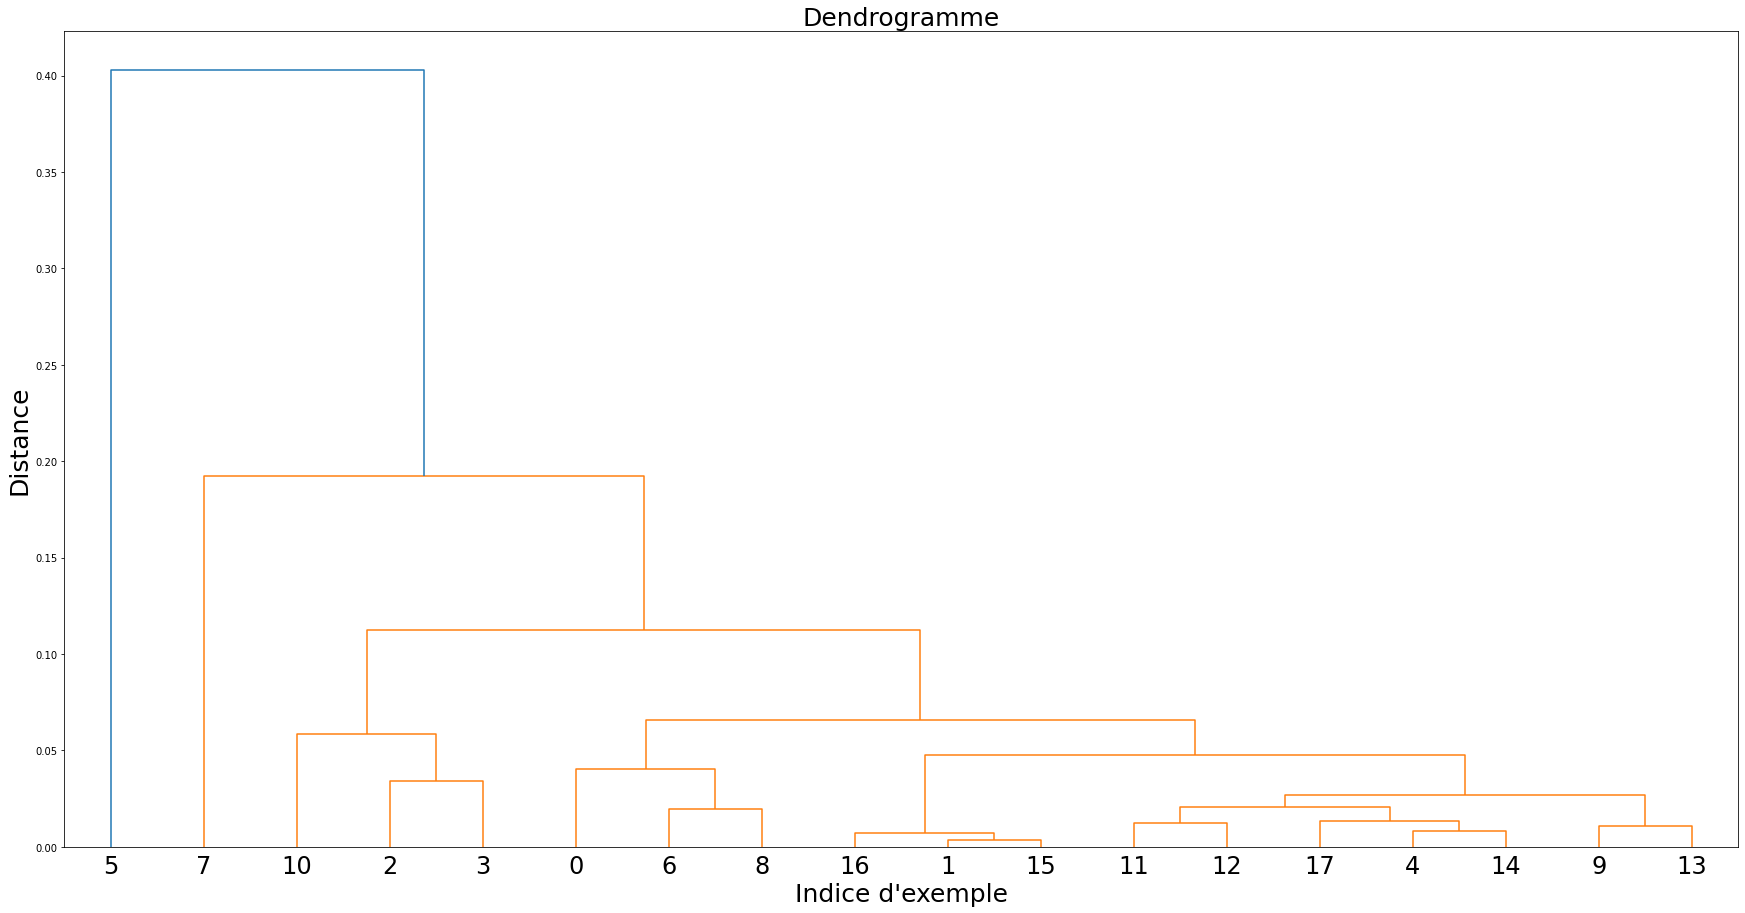

0.7097594738006592


In [214]:
before_average = time.time()
average = clust.CHA_average(df_echantillon, True, True)
after_average = time.time()
time_average = after_average - before_average
print(time_average)

In [215]:
clust.clustering_info(average,data_synthese,5)
clust_nocif_average = clust.cluster_nocif(average, data_synthese, 'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes','Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes')
print(clust_nocif_average)

Cluster 0:
Bicarbonate de soude
Fenugrec, graine

Cluster 1:
Fleur de sel, non iodée, non fluorée
Fucus vésiculeux (Fucus serratus ou Fucus vesiculosus), séché ou déshydraté

Cluster 2:
Gélatine, sèche
Gingembre, poudre

Cluster 3:
Base de pizza tomatée
Gingembre, racine crue

Cluster 4:
Ascophylle noueux ou goémon noir (Ascophyllum nodosum), séché ou déshydraté
Gracilaire ou ogonori (Gracilaria verrucosa), séchée ou déshydratée

19    Court-bouillon pour poissons, déshydraté
26                             Fenouil, graine
Name: Nom du Produit en Français, dtype: object


#### Algorithme K-means

Iteration :  1  Inertie :  55.049404439498225  Difference :  54.04440443949822
Iteration :  2  Inertie :  42.00652702284046  Difference :  13.042877416657767
Iteration :  3  Inertie :  29.847467567429486  Difference :  12.159059455410972
Iteration :  4  Inertie :  23.21929789293069  Difference :  6.628169674498796
Iteration :  5  Inertie :  20.31521805234523  Difference :  2.90407984058546
Iteration :  6  Inertie :  19.412699442483436  Difference :  0.9025186098617937
Iteration :  7  Inertie :  19.21007691567136  Difference :  0.2026225268120747
Iteration :  8  Inertie :  19.190048541366124  Difference :  0.020028374305237406
Iteration :  9  Inertie :  19.190048541366124  Difference :  0.0
[[0.57994045 0.33886731]
 [0.06754168 0.06151282]]


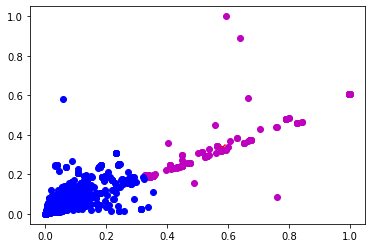

In [216]:
np.random.seed(42)
les_centres, l_affectation = clust.kmoyennes(2,df_synthese_norm, 0.005, 1000)
print(les_centres)
clust.affiche_resultat(df_synthese_norm,les_centres,l_affectation)

In [217]:
cluster_1 = l_affectation[0]  # le bleu
cluster_2 = l_affectation[1]  # le vert


data_etape_array = np.array(data_synthese["Nom du Produit en Français"])
data_clust_1 = data_etape_array[cluster_1]
data_clust_2 = data_etape_array[cluster_2]
key_1 = list(set(data_clust_1))
key_2 = list(set(data_clust_2))
dict_1 = dict()
dict_2 = dict()
for elt in key_1:
    dict_1[elt] = 0

for elt in data_clust_1:
    dict_1[elt] +=1
    
for elt in key_2:
    dict_2[elt] = 0
    
for elt in data_clust_2:
    dict_2[elt] +=1

In [218]:
df1 = pd.DataFrame.from_dict(dict_1, orient='index', columns=['Valeur']) #bleu
df1

,Valeur
"Eau minérale Ventadour, embouteillée, gazeuse, faiblement minéralisée (Le Pestrin, 07)",1
"Matière grasse végétale (type margarine) à 50-63% MG, allégée, doux, aux esters de stérol végétal",1
"Muffin anglais, petit pain spécial, préemballé",1
"Matière grasse végétale (type margarine) à 80% MG, salé",1
"Pâte sablée, crue",1
...,...
"Pâte feuilletée pur beurre, crue",1
"Pâte feuilletée, matière grasse végétale, crue",1
Valençay (fromage de chèvre),1
Beurre de cacao,1


In [219]:
df2 = pd.DataFrame.from_dict(dict_2, orient='index', columns=['Valeur']) #vert
df2

,Valeur
"Macédoine ou cocktail ou salade de fruits, au sirop, appertisé, non égoutté",1
Chou à la crème (chantilly ou pâtissière),1
"Courge spaghetti, pulpe, crue",1
"Cantal, Salers ou Laguiole",1
"Sauce soja, préemballée",1
...,...
"Chou chinois (pak-choi ou pé-tsai), cuit",1
"Sauce végétale type bolognaise, préemballée",1
"Bouillon de légumes, déshydraté reconstitué",1
"Pois chiche, cuit",1


In [220]:
# Aliment le plus nocif dans la df1

most_nocif = np.argmax(np.asarray(df1))
df1.iloc[most_nocif]

Valeur    1
Name: Eau minérale Ventadour, embouteillée, gazeuse, faiblement minéralisée (Le Pestrin, 07), dtype: int64

#### Synthèse

D'après une analyse visuelle des résultats obtenus, il a été observé que le cluster représenté par **le DataFrame 1 présente une mesure de nocivité plus élevée par rapport au cluster représenté par le DataFrame 2**. Cette conclusion est basée sur l'examen des graphiques et des visualisations générés par l'algorithme k-means. La comparaison visuelle permet d'identifier rapidement les tendances générales et de déterminer quel cluster peut être considéré comme le plus nocif en se basant sur les mesures de nocivité fournies par les deux DataFrames.

### Perspective Spécifique (Base Ingredients)

In [221]:
data_ingredients_analyse= data_ingredients[['Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes', 'Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes']]
data_ingredients_analyse.head()

,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes
0,4.580000e-08,0.21400
1,5.950000e-08,0.51600
2,1.050000e-07,0.73000
3,1.760000e-08,0.01140
4,1.410000e-09,0.00239


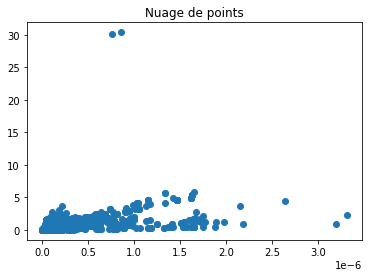

In [222]:
plt.scatter(data_ingredients_analyse['Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes'], data_ingredients_analyse['Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes'])
plt.title('Nuage de points')
plt.show()

In [223]:
df_ingredients_norm=clust.normalisation(data_ingredients_analyse)
df_ingredients_norm.head()

,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes
0,0.013839,0.007039
1,0.017979,0.016974
2,0.031727,0.024013
3,0.005318,0.000375
4,0.000426,0.000079


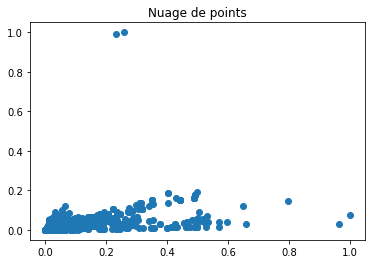

In [224]:
plt.scatter(df_ingredients_norm['Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes'], df_ingredients_norm['Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes'])
plt.title('Nuage de points')
plt.show()

Iteration :  1  Inertie :  30.279637476890752  Difference :  29.27863747689075
Iteration :  2  Inertie :  24.52589164200276  Difference :  5.75374583488799
Iteration :  3  Inertie :  18.657407393227793  Difference :  5.868484248774969
Iteration :  4  Inertie :  14.55041141723773  Difference :  4.106995975990063
Iteration :  5  Inertie :  13.251609341814545  Difference :  1.2988020754231844
Iteration :  6  Inertie :  12.961243240867478  Difference :  0.2903661009470664
Iteration :  7  Inertie :  12.924867581255159  Difference :  0.03637565961231992
Iteration :  8  Inertie :  12.87077310244423  Difference :  0.05409447881092788
Iteration :  9  Inertie :  12.853403872930041  Difference :  0.0173692295141894
Iteration :  10  Inertie :  12.853078191064412  Difference :  0.0003256818656289795
[[0.29612951 0.06103429]
 [0.01647355 0.00817931]]


KeyboardInterrupt: 

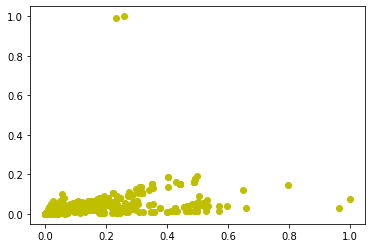

In [237]:
np.random.seed(52)
les_centres_ingredients, l_affectation_ingredients = clust.kmoyennes(2,df_ingredients_norm, 0.001, 1000)
print(les_centres_ingredients)
clust.affiche_resultat(df_ingredients_norm,les_centres_ingredients,l_affectation_ingredients)

In [ ]:
cluster_1 = l_affectation[0]  # le bleu
cluster_2 = l_affectation[1]  # le vert

data_ingredients_array = np.array(data_ingredients["Ingredients"])
data_clust_1 = data_ingredients_array[cluster_1]
data_clust_2 = data_ingredients_array[cluster_2]
key_1 = list(set(data_clust_1))
key_2 = list(set(data_clust_2))
dict_1 = dict()
dict_2 = dict()
for elt in key_1:
    dict_1[elt] = 0

for elt in data_clust_1:
    dict_1[elt] +=1
    
for elt in key_2:
    dict_2[elt] = 0
    
for elt in data_clust_2:
    dict_2[elt] +=1

In [ ]:
df1 = pd.DataFrame.from_dict(dict_1, orient='index', columns=['Valeur']) #bleu
df1

,Valeur
Crevette,1
Pâtes,2
Viande d'agneau sans os,1
Total,22
Mélange de chicorée et de café,1
Carotte,3
Blé dur,1
Vin rouge,1
Pomme de table,1
Autres étapes,19


In [ ]:
df2 = pd.DataFrame.from_dict(dict_2, orient='index', columns=['Valeur']) #vert
df2

,Valeur
Haricot vert,9
Total,249
Mélange de chicorée et de café,1
Romarin,1
Piment,2
...,...
Emmental,30
Lait demi-écremé,45
Beurre,38
Tomme,1


In [ ]:
# Ici j'enleve total et autres etapes qui ne sont pas vraiment des ingrédients

df1 = df1.drop(index='Total')
df1 = df1.drop(index='Autres étapes')

In [ ]:
# Ingrédient le plus nocif
most_nocif2 = np.argmax(np.asarray(df1))
df1.iloc[most_nocif2]

Valeur    10
Name: Farine de blé, dtype: int64


## Probleme 3: Peut on predire la classe des Ingredients?

##### Pour repondre a cette problématique on va d'abord utiliser l'algorithme de knn et puis Kmeans

In [ ]:
target = data_ingredients['Groupe d\'aliment'].unique()
print(target)
print('Nombre de classes :', target.size)

['aides culinaires et ingrédients divers' 'aliments infantiles' 'boissons'
 'entrées et plats composés' 'fruits, légumes, légumineuses et oléagineux'
 'glaces et sorbets' 'lait et produits laitiers' 'matières grasses'
 'produits céréaliers' 'produits sucrés' 'viandes, œufs, poissons']
Nombre de classes : 11


In [ ]:
data_ingredients_num=data_ingredients.copy()
columns_to_delete = ['Ciqual AGB', 'Ciqual code', 'Groupe d\'aliment', 'Sous-groupe d\'aliment','Sous-groupe','Nom Français', 'LCI Name','Code et Nom','Ingredients','Groupe']
for column in columns_to_delete:
    del data_ingredients_num[column]
data_ingredients_num.head()

,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,0.17,1.58000,4.580000e-08,0.21400,0.002670,1.160000e-07,4.070000e-08,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500,90.100,0.310,8.090,1.480000e-05
1,0.06,0.39900,5.950000e-08,0.51600,0.001090,2.810000e-08,7.160000e-09,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310,9.060,0.144,15.300,2.320000e-06
2,0.22,1.98000,1.050000e-07,0.73000,0.003770,1.440000e-07,4.780000e-08,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900,99.200,0.455,23.400,1.710000e-05
3,0.05,0.06210,1.760000e-08,0.01140,0.000890,2.640000e-08,2.050000e-08,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580,54.300,1.950,1.720,1.890000e-06
4,0.00,0.00985,1.410000e-09,0.00239,0.000045,8.710000e-10,3.390000e-10,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231,0.998,0.165,0.138,1.520000e-07


In [ ]:
data_ingredients_num_normal=clust.normalisation(data_ingredients_num)
data_ingredients_num_normal = np.array(data_ingredients_num_normal)
data_ingredients_num_normal

array([[0.01524262, 0.0143953 , 0.01383906, ..., 0.19157954, 0.01137834,
        0.07664894],
       [0.00538625, 0.00363527, 0.01797869, ..., 0.18803108, 0.02151899,
        0.01201524],
       [0.01972279, 0.01803967, 0.03172709, ..., 0.1946791 , 0.03291139,
        0.0885606 ],
       ...,
       [0.00267477, 0.00192017, 0.00407305, ..., 0.18699445, 0.00210407,
        0.00515217],
       [0.00950514, 0.0067775 , 0.02361994, ..., 0.19106258, 0.04616268,
        0.03302887],
       [0.07717028, 0.05500524, 0.22218148, ..., 0.27108246, 0.13559003,
        0.13131328]])

In [ ]:
# Copie les étiquettes de la colonne 'Groupe d\'aliment'
food_group_labels = data_ingredients['Groupe d\'aliment']
# Initialise un tableau numpy de zéros de la même taille que 'food_group_labels'
target_labels = np.zeros_like(food_group_labels)

# Boucle qui attribue à chaque élément de 'target_labels' la valeur correspondante de 'target'
for index, label in enumerate(target): 
    target_labels[np.where(food_group_labels == label)[0]] = index
    

### KNN

In [ ]:
# Création d'une permutation aléatoire des indices de 'target_labels'
random_permutation = np.random.permutation(np.arange(target_labels.size))
# Application de cette permutation à 'data_ingredients_num_normal' et 'target_labels'
perm_feat = data_ingredients_num_normal[random_permutation]
perm_label = target_labels[random_permutation]

In [ ]:
# Définition du nombre de subdivisions pour la validation croisée
num_folds = 10

# Initialisation du classificateur k-NN avec k = 2, la dimension de l'espace des attributs = 17 et la taille du voisinage pour le calcul des poids = 11
knn_classifier = cl.ClassifierKNN_MC(17, 2, 11)

# Création de listes vides pour stocker les précisions des prédictions pour l'ensemble d'apprentissage et de test
training_accuracy = []
test_accuracy = []

# Boucle sur chaque subdivision de la validation croisée
for i in range(num_folds+1):
    print(i)
    # Division des données en ensembles d'apprentissage et de test
    X_train, y_train, X_test, y_test = ut.crossval_strat(perm_feat, perm_label, num_folds, i)
    
    # Copie du classificateur k-NN
    trained_classifier = copy.deepcopy(knn_classifier)
    
    # Entraînement du classificateur sur l'ensemble d'apprentissage
    trained_classifier.train(X_train, y_train)
    
    a=trained_classifier.accuracy(X_train, y_train)
    print(a)
    # Calcul de la précision de la prédiction sur l'ensemble d'apprentissage et ajout à la liste 'training_accuracy'
    training_accuracy.append(a)
    
    # Calcul de la précision de la prédiction sur l'ensemble de test et ajout à la liste 'test_accuracy'
    test_accuracy.append(trained_classifier.accuracy(X_test, y_test))

0
0.9013157894736842
1
0.9002778183945022
2
0.9004094764551038
3


KeyboardInterrupt: 

In [ ]:
print(training_accuracy)
print ("moyenne: " ,np.mean(training_accuracy))
print ("variance: ", np.var(training_accuracy))

In [ ]:
print(test_accuracy)
print ("moyenne: " ,np.mean(test_accuracy))
print ("variance: ", np.var(test_accuracy))
print(len(training_accuracy))

#### Resulat 

In [ ]:
x_values = range(len(test_accuracy))

plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(x_values, training_accuracy, label='Training Accuracy', marker='o')

# Plot test accuracy
plt.plot(x_values, test_accuracy, label='Test Accuracy', marker='o')

plt.title('Performances KNN - Groupe d\'aliments')
plt.xlabel('Cross-Validation iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### On constate une  instabilité/variance dans les accuracy du test


#### Recherche k optimal

In [ ]:
def k_opt(desc_set, label_set, dimension, num_classes, retour=True, graphe=True):
    """
    Fonction qui permet de déterminer le nombre optimal de voisins K pour un classificateur KNN multiclasse.
    :param desc_set: un numpy array représentant les données d'entrée
    :param label_set: un numpy array représentant les étiquettes de classe correspondantes pour chaque donnée
    :param dimension: la dimension de l'espace d'entrée
    :param num_classes: le nombre de classes distinctes
    """
    max_k = int(np.sqrt(len(desc_set)))
    KNN_test_acc=[]
    List_k=[]
    for k in range(1, max_k, 2):
        # appel à la fonction crossval_strat() pour obtenir les données de train et de test
        desc_train, label_train, desc_test, label_test = ut.crossval_strat(desc_set, label_set, 10, 2)
        
        # initialisation d'un classificateur KNN multiclasse
        classifeurKNN_MC = cl.ClassifierKNN_MC(dimension, k, num_classes)
        List_k.append(k)
        
        # entrainement du modèle sur les données de train
        classifeurKNN_MC.train(desc_train, label_train)
        accKNN = classifeurKNN_MC.accuracy(desc_test, label_test)
        KNN_test_acc.append(accKNN)
    
    # l'indice du maximum de la liste d'accuracy
    index = np.argmax(KNN_test_acc)
    
    if graphe:
        plt.plot(List_k, KNN_test_acc)
        plt.title("Le variation de taux accuracy en fonction de k")
        plt.ylabel("Le taux de Accuracy")
        plt.xlabel("Le valeur de K")
        plt.show()

    if retour:
        return 2*index + 1

#### KNN optimal K


In [ ]:
k_optimal=k_opt(perm_feat,perm_label,17,11)
k_optimal

In [ ]:

knn_classifier = cl.ClassifierKNN_MC(17, k_optimal, 11)
X_train, y_train, X_test, y_test = ut.crossval_strat(perm_feat, perm_label, 11, 2)
knn_classifier.train(X_train,y_train)
knn_classifier.accuracy(X_test,y_test)

### non supervisé : k means


In [ ]:
data_et=data_etapes.copy()
sup = ['Code AGB', 'Code CIQUAL', 'Groupe d aliment', 'Sous-groupe d aliment','Nom du Produit en Français', 'LCI Name', 'Nom et code','DQR']
for column in sup:
    del data_et[column]
data_et

,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total,Agriculture.1,Transformation.1,Emballage.1,...,Emballage.16,Transport.16,Supermarché et distribution.16,Consommation.16,Total.16,DQR Overall,P,TiR,GR,TeR
0,0.654812,0.500987,0.024443,0.046250,0.004981,0.000407,1.231879,4.569259,1.492415,0.290252,...,0.001043,0.000899,0.000460,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79
1,0.032661,0.000000,0.050709,0.015277,0.004503,0.000000,0.103150,0.066043,0.000000,0.478390,...,0.003464,0.000671,0.000440,0.000000,0.006605,4.11,4.27,4.39,2.79,5.00
2,0.040826,0.000000,0.000000,0.014071,0.005629,0.003288,0.063814,0.082554,0.000000,0.000000,...,0.000000,0.000614,0.000550,0.000016,0.003717,3.54,2.74,4.28,2.80,4.34
3,0.082933,0.000000,0.027221,0.013011,0.005629,0.003288,0.132081,0.222514,0.000000,0.329456,...,0.001150,0.000583,0.000550,0.000016,0.004779,3.75,2.74,3.62,4.33,4.33
4,0.654812,0.500987,0.024443,0.046250,0.004981,0.000407,1.231879,4.569259,1.492415,0.290252,...,0.001043,0.000899,0.000460,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2.085451,0.045533,0.017899,0.016104,0.009053,0.002455,2.176494,21.683172,0.241985,0.275642,...,0.000034,0.000926,0.000914,0.000263,0.038303,2.47,3.77,2.02,2.01,2.08
2513,2.147376,0.010702,0.028263,0.024679,0.014295,0.033860,2.259175,22.327031,0.074157,0.435259,...,0.000053,0.001432,0.001443,0.002279,0.041251,2.45,3.66,1.28,2.04,2.82
2514,0.719615,0.000000,0.017899,0.067222,0.009053,0.002455,0.816244,3.143568,0.000000,0.275642,...,0.000034,0.003652,0.000914,0.000263,0.163057,3.68,4.60,2.54,2.59,5.00
2515,0.878692,0.000000,0.018973,0.082082,0.011054,0.034592,1.025393,3.838479,0.000000,0.225346,...,0.000939,0.004459,0.001116,0.003711,0.203390,3.56,4.30,2.62,2.34,5.00


In [ ]:
list_k=[i+2 for i in range(11)]
list_Centres_et_U=[]
for k in list_k:
    #print(k)
    Centres,U=clust.kmoyennes(k,data_et,0.05,100,False)
    list_Centres_et_U.append((Centres,U))
    
list_Index_Dunn=[]
for k in list_k:
    #print(k)
    index_Dunn_k=clust.index_Dunn(data_et,list_Centres_et_U[k-2][0],list_Centres_et_U[k-2][1])
    list_Index_Dunn.append(index_Dunn_k)

plt.figure(figsize=(8, 6))
plt.title('Index de Dunn - K-Moyennes')
plt.plot(list_k,list_Index_Dunn)
plt.xlabel('K')
plt.ylabel('Index')
plt.show()

In [ ]:
data_etape_norml=clust.normalisation(data_et)

In [ ]:
np.random.seed(42)
les_centres, l_affectation = clust.kmoyennes(11,data_etape_norml, 0.05, 100)
print(les_centres)
clust.affiche_resultat(data_etape_norml,les_centres,l_affectation)

In [ ]:
print(len(les_centres))

In [ ]:
nb=0
for group in l_affectation:
    nb=nb+len(l_affectation[group])
    print("Le groupe ",group," contient ",len(l_affectation[group]),"elements")
    
print("nb :",nb)